In [1]:
from PIL import Image
from numpy import asarray
import numpy as np
import matplotlib.pyplot as plt

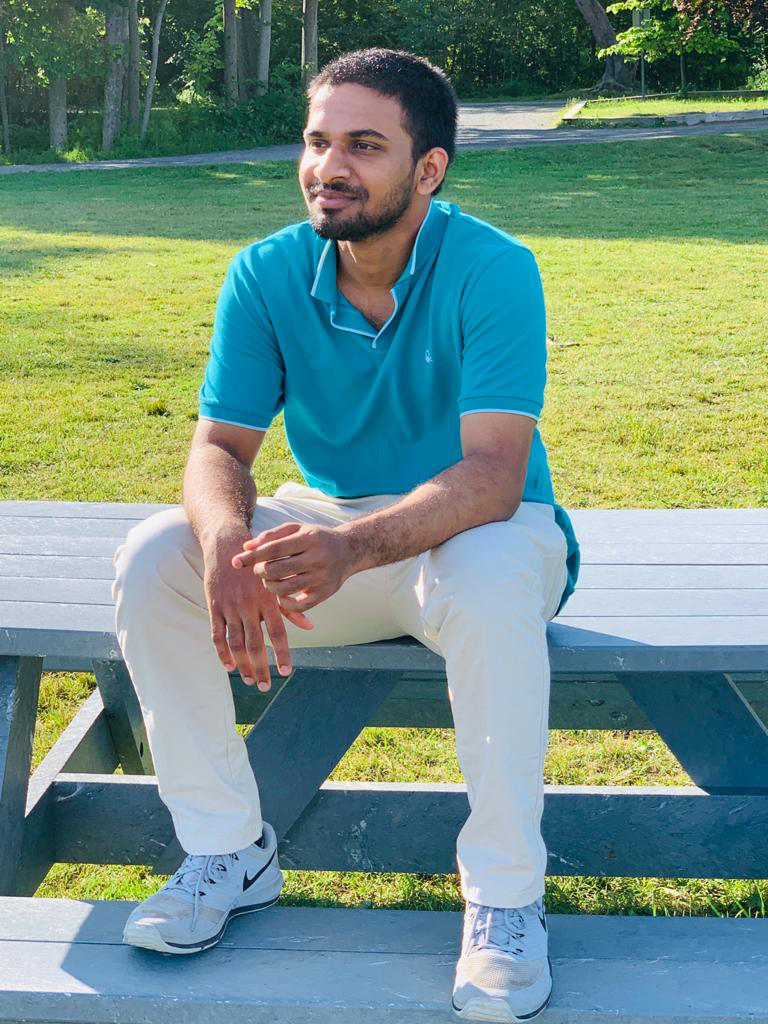

In [2]:
image = Image.open('D:\MyPhoto.jpeg')
image

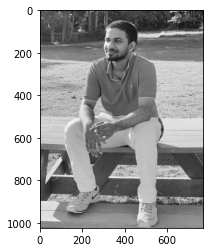

In [3]:
data = asarray(image)
# summarize shape
height = len(data)
width = len(data[0])
gsi = np.zeros((height, width))
for i in range(height):
    for j in range(width):
        gsi[i][j] = ((0.2126 * data[i][j][0]) + (0.7152 * data[i][j][1]) + (0.0722 * data[i][j][2]))
img = Image.fromarray(gsi)
plt.imshow(img)

In [4]:
def conversion(gsi, kernel):
    gsiHeight, gsiWidth = gsi.shape
    gsiHeight = gsiHeight - kheight + 1
    gsiWidth = gsiWidth - kwidth + 1
    updated_image = np.zeros((gsiHeight, gsiWidth))

    for i in range(gsiHeight):
        for j in range(gsiWidth):
            sub_matrix = np.zeros((kheight, kwidth))
            # numpy slicing
            sub_matrix = gsi[i:i + kheight, j:j + kwidth]
            updated_image[i][j] = np.sum(sub_matrix * kernel)
    img = Image.fromarray(updated_image)
    return updated_image

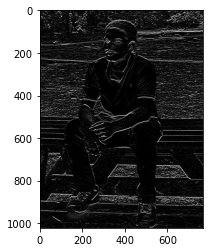

In [5]:
kernel_vertical = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel_horizantal = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
kheight, kwidth = kernel_horizantal.shape
horizantal_filter = conversion(gsi, kernel_horizantal)
vertical_filter = conversion(gsi, kernel_vertical)
horizantal = Image.fromarray(horizantal_filter)
plt.imshow(horizantal)

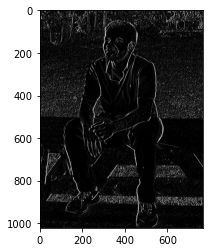

In [6]:
vertical = Image.fromarray(vertical_filter)
plt.imshow(vertical)

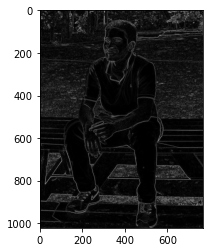

In [7]:
# gradient magnitude of horizantal filter and vertical filter
gradient_magnitude = np.sqrt(np.square(horizantal_filter) + np.square(vertical_filter))
gradient_magnitude = gradient_magnitude * 255.0 / gradient_magnitude.max()
image = Image.fromarray(gradient_magnitude)
plt.imshow(image)

In [8]:
def gaussian_kernel(size, verbose=False):
    array = np.linspace(-(size // 2), size // 2, size)
    mean = np.sum(array)/array.size
    variance = np.sum((array - mean)**2)/array.size
    x = np.outer(np.ones((size,)), array)
    xsquare = np.square(x)
    ysquare = x.transpose()
    xsplusys = np.add(xsquare, ysquare)
    filter = 1 / (2 * np.pi * variance) * np.exp(-xsplusys / (2 * variance))
    return filter

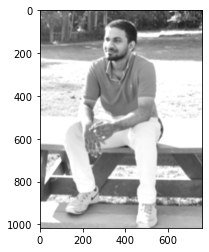

In [9]:
gaussiankernel = gaussian_kernel(9)
kheight, kwidth = gaussiankernel.shape
gaussian = conversion(gsi, gaussiankernel)
gaussianimage = Image.fromarray(gaussian)
plt.imshow(gaussianimage)

In [10]:
import matplotlib
import pandas as pd

In [11]:
df = pd.read_csv(r'D:\wine.csv')
df

,Label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


0.0898876404494382


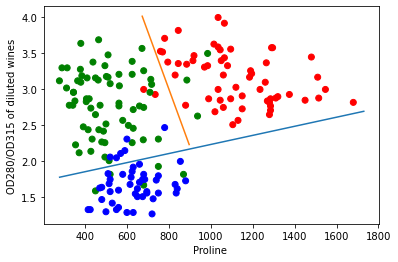

In [12]:
label = df['Label'].to_numpy()
xaxis = df['Proline ']
yaxis = df['OD280/OD315 of diluted wines']
colors = ['red', 'green', 'blue']
plt.scatter(xaxis, yaxis, c=label, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('Proline ')
plt.ylabel('OD280/OD315 of diluted wines')
#line1
x_values = [1730, 279]
y_values = [2.696, 1.780]
plt.plot(x_values, y_values)
#line 2
xvalues = [673, 897]
yvalues = [4.017, 2.234]
plt.plot(xvalues, yvalues)
total_misclassification = 16
total_count = df['Label'].size
error_rate = total_misclassification / total_count
print(error_rate)
plt.show()